In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
import datetime

In [2]:
data=load_breast_cancer()

In [3]:
X=data.data
y=data.target

In [4]:
X.shape

(569, 30)

In [5]:
np.unique(y)

array([0, 1])

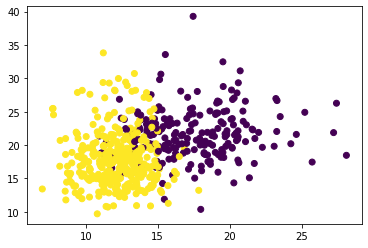

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [7]:
from sklearn.decomposition import PCA

In [8]:
X_dr=PCA(2).fit_transform(X)

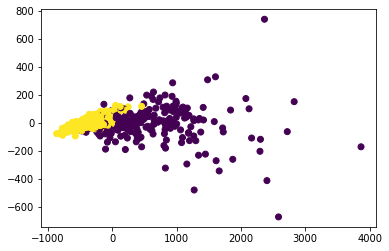

In [9]:
plt.scatter(X_dr[:,0],X_dr[:,1],c=y)
plt.show()

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=40)

In [ ]:
kernels=["linear","rbf","sigmoid"]

In [ ]:
for kernel in kernels:
    time0=time()
    clf=SVC(kernel=kernel
            ,gamma="auto"
            ,cache_size=100
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %(kernel,clf.score(Xtest,Ytest)))

In [21]:
kernels=["linear","poly","rbf","sigmoid"]

In [22]:
for kernel in kernels:
    time0=time()
    clf=SVC(kernel=kernel
            ,gamma="auto"
            ,degree=1
            ,cache_size=100
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %(kernel,clf.score(Xtest,Ytest)))

The accuracy under kernel linear is 0.953216
The accuracy under kernel poly is 0.959064
The accuracy under kernel rbf is 0.672515
The accuracy under kernel sigmoid is 0.672515


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [14]:
gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)




In [15]:
gamma_range



array([1.00000000e-10, 3.79269019e-10, 1.43844989e-09, 5.45559478e-09,
       2.06913808e-08, 7.84759970e-08, 2.97635144e-07, 1.12883789e-06,
       4.28133240e-06, 1.62377674e-05, 6.15848211e-05, 2.33572147e-04,
       8.85866790e-04, 3.35981829e-03, 1.27427499e-02, 4.83293024e-02,
       1.83298071e-01, 6.95192796e-01, 2.63665090e+00, 1.00000000e+01])

In [16]:
param_grid = dict(gamma = gamma_range
                 ,coef0 = coef0_range)

0.9532163742690059 0.00011513953993264481


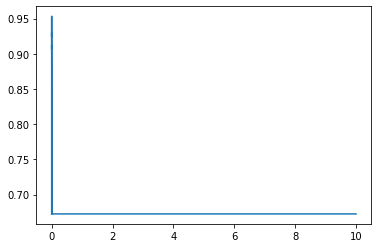

In [35]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()




In [36]:
time0 = time()
gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range
                 ,coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel = "poly",degree=1,cache_size=5000),
param_grid=param_grid, cv=cv)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.5f" % (grid.best_params_,
grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

KeyboardInterrupt: 

0.9766081871345029 9.80265306122449


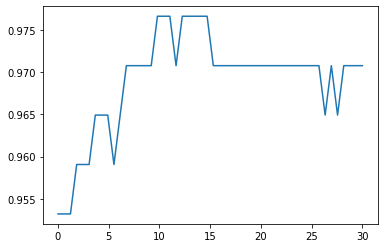

In [38]:
#调线性核函数
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()



0.6842105263157895 1.2340816326530613


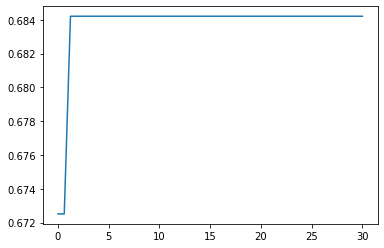

In [39]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma =
0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.6842105263157895 5.0


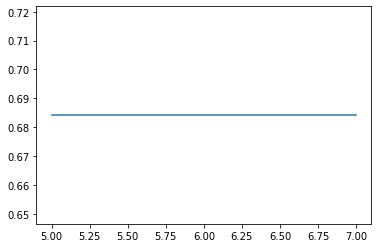

In [40]:
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma =
0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()